In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
from __future__ import division
%matplotlib inline

In [2]:
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 5.1 MB/s eta 0:00:00


In [3]:
from chart_studio import plotly
import plotly.offline as pyoff
import plotly.graph_objs as go

In [4]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
url ='https://raw.githubusercontent.com/Thongai/coding_numpy/main/Site_Downtime_12Month.csv'
df = pd.read_csv(url)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45762 entries, 0 to 45761
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          45762 non-null  object 
 1   Province       45762 non-null  object 
 2   Code_Site      45762 non-null  object 
 3   Site_name      45762 non-null  object 
 4   District       45762 non-null  object 
 5   Issue          45762 non-null  object 
 6   Part           45762 non-null  object 
 7   Number_ofCell  45762 non-null  int64  
 8   Downtime_hour  45762 non-null  float64
 9   Count_Down     45762 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 3.5+ MB


## 1.	Downtime ເກີດຂຶ້ນຫລາຍທີ່ສຸດແມ່ນຊ່ວງເວລາໃດ, ກາງເວັນ ຫລື ກາງຄືນ?

In [8]:
df.describe()

,Number_ofCell,Downtime_hour,Count_Down
count,45762.000000,45762.000000,45762.000000
mean,11.189633,5.421472,1.838600
std,5.907481,10.177315,1.762039
min,1.000000,0.000000,0.000000
25%,7.000000,1.000000,1.000000
50%,10.000000,2.555556,1.000000
75%,15.000000,6.357143,2.000000
max,61.000000,545.000000,55.000000


In [9]:
Monthdown = df.groupby (["Month"] , sort=False)["Downtime_hour"].sum()
print(Monthdown)

Month
2022-04-30    18199.377771
2022-05-31    21889.412981
2022-06-30    21403.459699
2022-07-31    25450.361068
2022-08-31    31422.481998
2022-09-30    24775.245982
2022-10-31    16943.688081
2022-11-30    10167.967594
2022-12-31    12505.701643
2023-01-31    10054.624353
2023-02-28     9743.391804
2023-03-31    17612.379019
2023-04-30    27929.326005
Name: Downtime_hour, dtype: float64


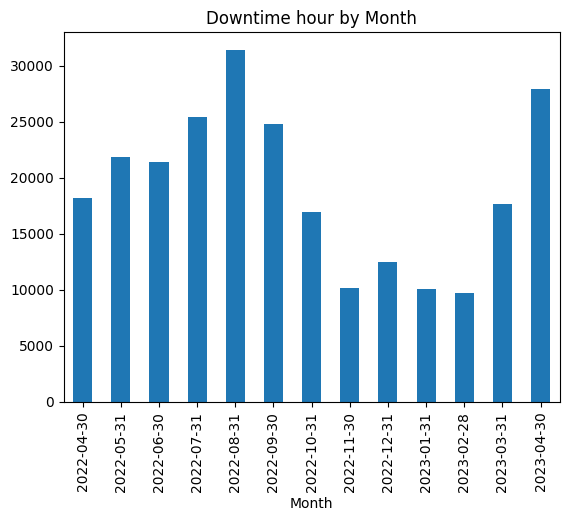

In [10]:
Monthdown.plot.bar()
plt.title('Downtime hour by Month')
plt.show()


In [11]:
Partdown = df.groupby (["Part"] , sort=False)["Downtime_hour"].sum()
print(Partdown)

Part
Day      134679.906676
Night    113417.511322
Name: Downtime_hour, dtype: float64


[Text(0, 0, '113418'), Text(0, 0, '134680')]

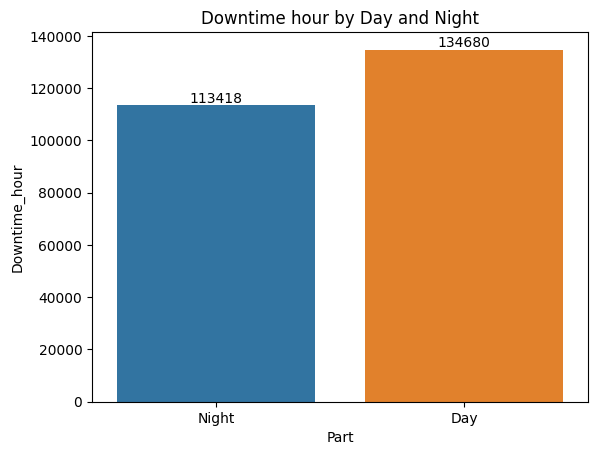

In [12]:
#Partdown.plot.bar()
#Partdown.plot.bar()
plt.title('Downtime hour by Day and Night')
#plt.show()
issuedown = sns.barplot(x=Partdown.index, y=Partdown, order=Partdown.sort_values().index);

issuedown.bar_label(issuedown.containers[0])


### AC Power Downtime by Province

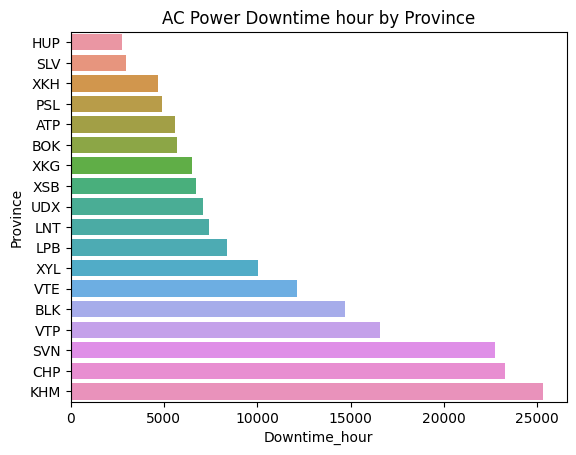

In [13]:
Pdown = df[df["Issue"] == "AC POWER" ]

Provdown = Pdown.groupby (["Province"] , sort=False)["Downtime_hour"].sum()
#print(Provdown)
plt.title('AC Power Downtime hour by Province')
Provdown = sns.barplot(y=Provdown.index, x=Provdown, order=Provdown.sort_values().index);
#Provdown.bar_label(Provdown.containers[0])

### AC Power Downtime hour by KHM District

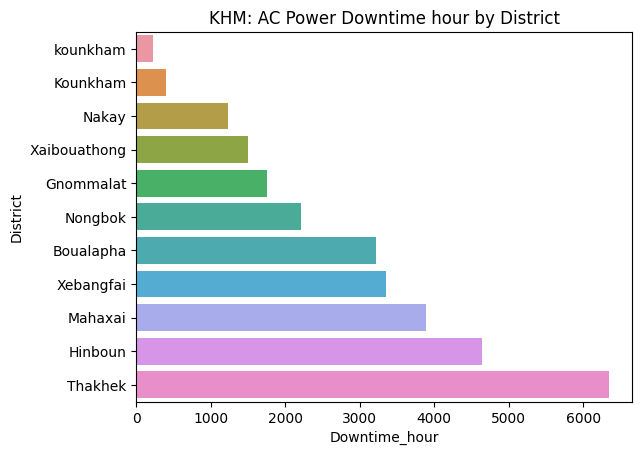

In [14]:
KHMdown = df[df["Province"] == "KHM" ]

District_down = KHMdown.groupby (["District"] , sort=False)["Downtime_hour"].sum()

plt.title('KHM: AC Power Downtime hour by District')
District_down = sns.barplot(y=District_down.index, x=District_down, order=District_down.sort_values().index);
#District_down.bar_label(District_down.containers[0])
#print(District_down)

In [ ]:
Issue = df.groupby (["Issue"] , sort=False)["Downtime_hour"].sum()

print(Issue)

plt.title('Downtime hour by Issue')
Issue = sns.barplot(x=Issue.index, y=Issue, order=Issue.sort_values().index);
Issue.bar_label(Issue.containers[0])

## 2.	Downtime ທີ່ເກີດຂຶ້ນຫລາຍຊົ່ວໂມງ ສຳພັນກັບ sub group ໃດ? 

In [15]:
Issue = df.groupby (["Issue"] , sort=False)["Downtime_hour"].sum()




Issue
AC POWER     187478.180830
OTHER          7705.013265
OPTIC         40865.626456
EQUIPMENT      9367.151357
RECTIFIER      2681.446091
Name: Downtime_hour, dtype: float64


[Text(0, 0, '2681.45'),
 Text(0, 0, '7705.01'),
 Text(0, 0, '9367.15'),
 Text(0, 0, '40865.6'),
 Text(0, 0, '187478')]

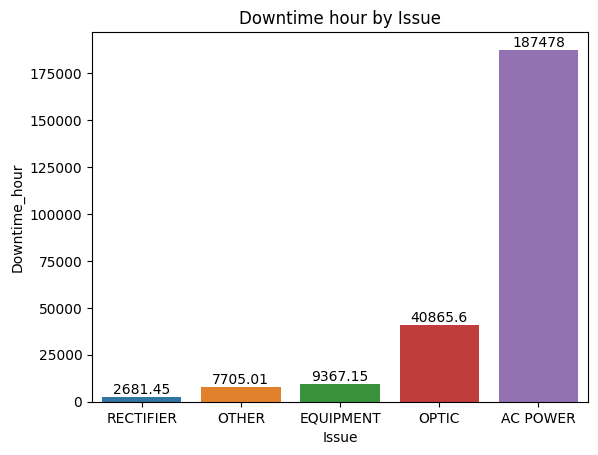

In [16]:
plt.title('Downtime hour by Issue')
Issue = sns.barplot(x=Issue.index, y=Issue, order=Issue.sort_values().index);
Issue.bar_label(Issue.containers[0])


In [17]:
df

,Month,Province,Code_Site,Site_name,District,Issue,Part,Number_ofCell,Downtime_hour,Count_Down
0,2022-04-30,ATP,ATP0002,ATP0002_MAIPHOSY,Samakkhixai,AC POWER,Day,10,2.500000,2
1,2022-04-30,ATP,ATP0003,ATP0003_NAXAITHONG,Samakkhixai,AC POWER,Night,15,4.866667,1
2,2022-04-30,ATP,ATP0008,ATP0008_TV_TOWER,Samakkhixai,AC POWER,Day,4,0.750000,1
3,2022-04-30,ATP,ATP0010,ATP0010_XEKATAMTOK,Xaisettha,AC POWER,Day,4,49.500000,5
4,2022-04-30,ATP,ATP0010,ATP0010_XEKATAMTOK,Xaisettha,AC POWER,Night,4,0.500000,1
...,...,...,...,...,...,...,...,...,...,...
45757,2023-04-30,XYL,XYL0182,XYL0182_NONGPHUKBONG,Boten,AC POWER,Day,4,11.000000,12
45758,2023-04-30,XYL,XYL0182,XYL0182_NONGPHUKBONG,Boten,AC POWER,Night,4,9.750000,4
45759,2023-04-30,XYL,XYL0183,XYL0183_TONTAN,Boten,AC POWER,Day,4,10.500000,10
45760,2023-04-30,XYL,XYL0183,XYL0183_TONTAN,Boten,AC POWER,Night,4,2.000000,2


In [18]:
ACPowdown = df[['Month', 'Issue','Downtime_hour']]
ACP = ACPowdown[ACPowdown["Issue"] == "AC POWER" ]
ACPowerDown=ACP.groupby(["Month"])["Downtime_hour"].sum()
print(ACPowerDown)

Month
2022-04-30    15043.965661
2022-05-31    17448.322572
2022-06-30    16553.703871
2022-07-31    20423.342205
2022-08-31    21032.137856
2022-09-30    19303.591421
2022-10-31    12298.518292
2022-11-30     6905.425304
2022-12-31     9068.462368
2023-01-31     6577.666805
2023-02-28     7316.890805
2023-03-31    12350.661231
2023-04-30    23155.492440
Name: Downtime_hour, dtype: float64


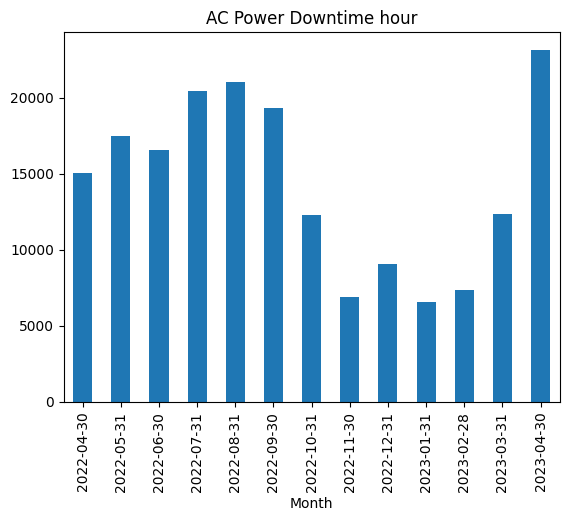

In [19]:
ACPowerDown.plot.bar()
plt.title('AC Power Downtime hour')
plt.show()

## 3.	Site ທີ Downtime ສູງມີ Battery Backup time ບໍ່?

In [20]:
URL = 'https://raw.githubusercontent.com/Thongai/coding_numpy/main/ACPower_OverallScore.csv'

sitedown = pd.read_csv(URL)
sitedown

,Month,Province,Code_Site,Site_Name,District,OverallScore,Number_ofCell,Total_Sub,Total_Volume_Mb,Total_Revenue,...,Access_Time_Minute,LodAC,LodDC,Capacity_Battery_V,Cpcity_Bttery_Ah,Capacity_Solar_V,Cpcity_Solr_Ah,Capacity_Gen_KVA,Backup_time_Minute,Battery
0,2022-04-30,ATP,ATP0040,ATP0040_MAIHINLAD,Sanamxai,ATP0040,18,4351,2.279905e+07,3.866289e+07,...,135,16.0,25.00,48,100,0,0,0.0,20,Battery
1,2022-04-30,ATP,ATP0052,ATP0052_CHALERNXAY,Sanxai,ATP0052,12,409,3.350456e+06,6.510625e+06,...,120,21.0,57.00,48,200,0,0,0.0,25,Battery
2,2022-04-30,ATP,ATP0055,ATP0055_KM100,Sanamxai,ATP0055,17,1156,1.279594e+07,2.464718e+07,...,120,21.0,57.00,48,500,0,0,0.0,40,Battery
3,2022-04-30,ATP,ATP0056,ATP0056_BORKHAMVANGTAD,Sanxai,ATP0056,9,6584,6.420353e+06,1.132323e+07,...,70,21.0,57.00,48,200,0,0,0.0,20,Battery
4,2022-04-30,BLK,BLK0006,BLK0006_BOUAVENGKHAM,Pakxan,BLK0006,12,7898,3.224917e+07,4.755806e+07,...,60,8.0,32.25,48,200,0,0,0.0,20,Battery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5514,2023-04-30,HUP,HUP0059,HUP0059_HOUAYMOUNG,Koune,HUP0059,13,4671,1.767112e+07,3.020878e+07,...,360,9.0,35.00,48,500,0,0,5.5,30,Battery_Gen
5515,2023-04-30,VTP,VTP0015,VTP0015_NONGKHONH,Phonhong,VTP0015,12,74758,1.466404e+07,3.795360e+07,...,60,14.0,63.00,48,200,0,0,0.0,240,Battery
5516,2023-04-30,LNT,LNT0055,LNT0055_HARTLOM,Nale,LNT0055,13,3869,1.234149e+07,1.976589e+07,...,150,4.0,17.00,48,200,0,0,0.0,30,Battery
5517,2023-04-30,BLK,BLK0127,BLK0127_THONGNAMEE,Pakkading,BLK0127,43,58649,7.812988e+07,1.211252e+08,...,120,14.0,60.20,0,0,0,0,25.0,0,Generator


In [21]:
sitedown.head()

,Month,Province,Code_Site,Site_Name,District,OverallScore,Number_ofCell,Total_Sub,Total_Volume_Mb,Total_Revenue,...,Access_Time_Minute,LodAC,LodDC,Capacity_Battery_V,Cpcity_Bttery_Ah,Capacity_Solar_V,Cpcity_Solr_Ah,Capacity_Gen_KVA,Backup_time_Minute,Battery
0,2022-04-30,ATP,ATP0040,ATP0040_MAIHINLAD,Sanamxai,ATP0040,18,4351,2.279905e+07,3.866289e+07,...,135,16.0,25.00,48,100,0,0,0.0,20,Battery
1,2022-04-30,ATP,ATP0052,ATP0052_CHALERNXAY,Sanxai,ATP0052,12,409,3.350456e+06,6.510625e+06,...,120,21.0,57.00,48,200,0,0,0.0,25,Battery
2,2022-04-30,ATP,ATP0055,ATP0055_KM100,Sanamxai,ATP0055,17,1156,1.279594e+07,2.464718e+07,...,120,21.0,57.00,48,500,0,0,0.0,40,Battery
3,2022-04-30,ATP,ATP0056,ATP0056_BORKHAMVANGTAD,Sanxai,ATP0056,9,6584,6.420353e+06,1.132323e+07,...,70,21.0,57.00,48,200,0,0,0.0,20,Battery
4,2022-04-30,BLK,BLK0006,BLK0006_BOUAVENGKHAM,Pakxan,BLK0006,12,7898,3.224917e+07,4.755806e+07,...,60,8.0,32.25,48,200,0,0,0.0,20,Battery


In [22]:
sitedown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5519 entries, 0 to 5518
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                5519 non-null   object 
 1   Province             5519 non-null   object 
 2   Code_Site            5519 non-null   object 
 3   Site_Name            5519 non-null   object 
 4   District             5519 non-null   object 
 5   OverallScore         5519 non-null   object 
 6   Number_ofCell        5519 non-null   int64  
 7   Total_Sub            5519 non-null   int64  
 8   Total_Volume_Mb      5519 non-null   float64
 9   Total_Revenue        5519 non-null   float64
 10  Rev_Priority         5519 non-null   object 
 11  Revenue_Loss         5519 non-null   int64  
 12  LTC_Sub              5376 non-null   float64
 13  LTC_Volume_Mb        5376 non-null   float64
 14  LTC_Revenue          5376 non-null   float64
 15  TPlus_Sub            5376 non-null   f

In [23]:
sitedown['Total_Revenue'] = sitedown['Total_Revenue'].astype("int64")

In [24]:
sitedown['Revenue_Loss'] = sitedown['Revenue_Loss'].astype("int64")
#sitedown['Total_Revenue'] = sitedown['Total_Revenue'].astype("float64")
#sitedown['Total_Sub'] = sitedown['Total_Sub'].astype("float64")

In [25]:
site_downmax = sitedown[['Month', 'Site_Name','AC_Power_hour']]

site_downmax=site_downmax.groupby(["Site_Name"]).sum('AC_Power_hour')["AC_Power_hour"].sort_values(ascending=False)

#test1.groupby('Site_Name')['AC_Power_hour'].max().sort_values(['AC_Power_hour'], ascending=False)

print(site_downmax)

Site_Name
XKG0061_XEKONG5_DAM      1731.7
BLK0147_THONGMEXAY       1163.2
LNT0039_DK14              615.3
SVN0255_LARDHOR           576.6
VTP0247_NONGSAN           560.4
                          ...  
KHM0135_PHATHOUNG           0.0
KHM0186_NAKHARM             0.0
KHM0212_NATAN               0.0
KHM0084_NAKHAMCHOUANG       0.0
KHM0087_NAMPHO              0.0
Name: AC_Power_hour, Length: 438, dtype: float64


In [26]:
#ACPowdown = df[['Month', 'Issue','Downtime_hour']]
#sitedown5 = sitedown[sitedown["Site_Name"] == "XKG0061_XEKONG5_DAM" ]

#site_loss3 = sitedown[sitedown["Site_Name"] == "XKG0061_XEKONG5_DAM" ]
#sitedown5 = sitedown[sitedown["Site_Name"] == "BLK0147_THONGMEXAY" ]

#siteVTE = sitedown[sitedown["Province"] == "VTE" ]
site_loss = sitedown.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum()

site_top_5_rev_loss = site_loss.groupby(['Site_Name'])['AC_Power_hour'].sum().sort_values(ascending=False)

TOP_5 = site_top_5_rev_loss.head(10)
display(TOP_5)

Site_Name
XKG0061_XEKONG5_DAM      1731.7
BLK0147_THONGMEXAY       1163.2
LNT0039_DK14              615.3
SVN0255_LARDHOR           576.6
VTP0247_NONGSAN           560.4
LNT0097_BAN_NALEA_KAO     555.9
KHM0193_NASAIR            502.8
XSB0030_NAMTHOUY          496.1
XSB0053_NAMXANB           490.8
XSB0029_NAMPOUNG          480.3
Name: AC_Power_hour, dtype: float64

In [27]:
sitedown_loss = sitedown.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum()

site_top10_rev_loss = sitedown_loss.groupby(['Site_Name'])['AC_Power_hour'].sum().sort_values(ascending=False)

TOP10 = site_top10_rev_loss.head(10)
display(sitedown_loss)

,AC_Power_hour,Total_Revenue,Revenue_Loss
Site_Name,,,
ATP0040_MAIHINLAD,60.6,332460780,4263778
ATP0052_CHALERNXAY,273.6,112099741,4638368
ATP0055_KM100,77.0,217313817,10104053
ATP0056_BORKHAMVANGTAD,157.3,199314278,10145638
ATP0069_NAMKONG_DAM1,185.5,410228139,18912300
...,...,...,...
XYL0161_M_THONGMIXAY,30.8,539617323,4758414
XYL0170_BORSAN,166.0,237887866,5029110
XYL0176_MUENGHAM,94.7,418598482,5128294


[Text(0, 0, '480.3'),
 Text(0, 0, '490.8'),
 Text(0, 0, '496.1'),
 Text(0, 0, '502.8'),
 Text(0, 0, '555.9'),
 Text(0, 0, '560.4'),
 Text(0, 0, '576.6'),
 Text(0, 0, '615.3'),
 Text(0, 0, '1163.2'),
 Text(0, 0, '1731.7')]

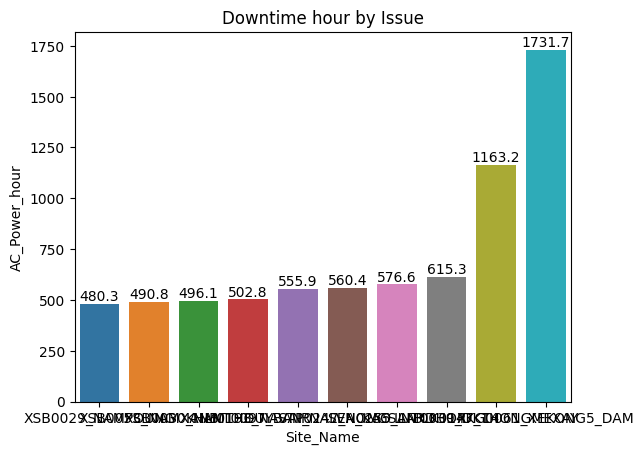

In [28]:
plt.title('Downtime hour by Issue')
TOP_5 = sns.barplot(x=TOP_5.index, y=TOP_5, order=TOP_5.sort_values().index);
TOP_5.bar_label(TOP_5.containers[0])


#fig.tight_layout()

In [29]:
stdown = sitedown[sitedown["Site_Name"] == "XKG0061_XEKONG5_DAM"]
#sitedown5 = sitedown[sitedown["Site_Name"] == "BLK0147_THONGMEXAY" ]
#stdown = stdown.groupby("Site_Name")["AC_Power_hour","Backup_time_Minute","Distance_KM","Access_Time_Minute"].sum().reset_index();
#stdown = stdown.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();
stdown = stdown.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();
#stdown = sitedown.groupby("Site_Name")["Backup_time_Minute","Distance_KM","Access_Time_Minute"].sum()
TOP_5 = stdown.head(5)
display(TOP_5)
#stdown

,Site_Name,Battery,Backup_time_Minute,Distance_KM,Access_Time_Minute
0,XKG0061_XEKONG5_DAM,Battery,120,250.0,360


## 7.	ລາຍຮັບທີ່ສູນເສຍຈາກດາວທາມຂອງແຕ່ລະສະຖານີ 

### Top10 Site high Downtime
### 1.

In [149]:
#KHM_Thakhek = KHM_sitedown[df_loss["District"] == "Thakhek" ]
Top_Site_high_Down = sitedown.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum()

Top10_Site_high_Down = Top_Site_high_Down.groupby(['Site_Name'])['AC_Power_hour'].sum().sort_values(ascending=False)

High_TOP10 = Top10_Site_high_Down.head(10)
display(High_TOP10)

Site_Name
XKG0061_XEKONG5_DAM      1731.7
BLK0147_THONGMEXAY       1163.2
LNT0039_DK14              615.3
SVN0255_LARDHOR           576.6
VTP0247_NONGSAN           560.4
LNT0097_BAN_NALEA_KAO     555.9
KHM0193_NASAIR            502.8
XSB0030_NAMTHOUY          496.1
XSB0053_NAMXANB           490.8
XSB0029_NAMPOUNG          480.3
Name: AC_Power_hour, dtype: float64

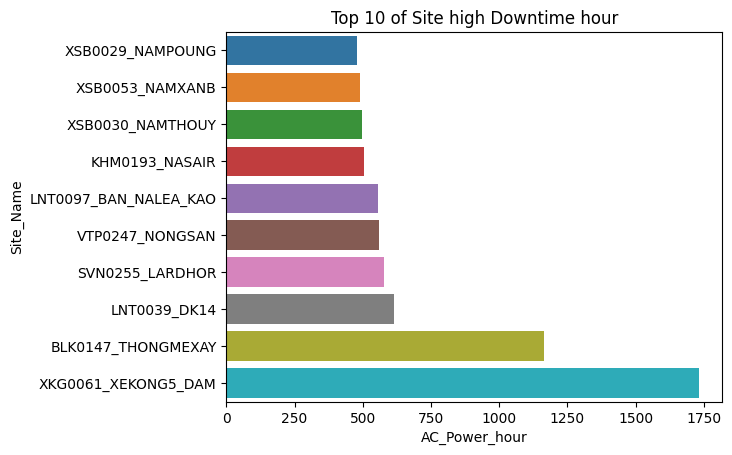

In [150]:
#Top10_Site = Test_TOP10.groupby (["Site_Name"] , sort=False)["AC_Power_hour"].sum()
#Site_TOP10 = Top10_Site.head(10)
plt.title('Top 10 of Site high Downtime hour')
Top10_Site = sns.barplot(y=High_TOP10.index, x=High_TOP10, order=High_TOP10.sort_values().index);
#District_down.bar_label(District_down.containers[0])
#print(District_down)

In [30]:
XKG0061 = sitedown[sitedown["Site_Name"] == "XKG0061_XEKONG5_DAM"]
#sitedown5 = sitedown[sitedown["Site_Name"] == "BLK0147_THONGMEXAY" ]
#stdown = stdown.groupby("Site_Name")["AC_Power_hour","Backup_time_Minute","Distance_KM","Access_Time_Minute"].sum().reset_index();
XKG0061_revloss = XKG0061.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

XKG0061_batt = XKG0061.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();
XKG0061_revloss['AC_Power_hour'] = XKG0061_revloss.apply(lambda x: "{:,}".format(x['AC_Power_hour']), axis=1)
XKG0061_revloss['Total_Revenue'] = XKG0061_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
XKG0061_revloss['Revenue_Loss'] = XKG0061_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(XKG0061_revloss)
print(XKG0061_batt)

             Site_Name AC_Power_hour Total_Revenue Revenue_Loss
0  XKG0061_XEKONG5_DAM       1,731.7    86,339,233   14,657,370
             Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  XKG0061_XEKONG5_DAM  Battery                 120        250.0   

   Access_Time_Minute  
0                 360  


### 2.

In [31]:
BLK0147 = sitedown[sitedown["Site_Name"] == "BLK0147_THONGMEXAY"]
BLK0147_revloss = BLK0147.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

BLK0147_batt = BLK0147.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

BLK0147_revloss['AC_Power_hour'] = BLK0147_revloss.apply(lambda x: "{:,}".format(x['AC_Power_hour']), axis=1)
BLK0147_revloss['Total_Revenue'] = BLK0147_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
BLK0147_revloss['Revenue_Loss'] = BLK0147_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)
print(BLK0147_revloss)
print(BLK0147_batt)

            Site_Name AC_Power_hour Total_Revenue Revenue_Loss
0  BLK0147_THONGMEXAY       1,163.2   198,647,787    8,895,821
            Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  BLK0147_THONGMEXAY  Battery                  10         88.0   

   Access_Time_Minute  
0                 240  


### 3.

In [32]:
LNT0039 = sitedown[sitedown["Site_Name"] == "LNT0039_DK14"]
LNT0039_revloss = LNT0039.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

LNT0039_batt = LNT0039.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

LNT0039_revloss['AC_Power_hour'] = LNT0039_revloss.apply(lambda x: "{:,}".format(x['AC_Power_hour']), axis=1)
LNT0039_revloss['Total_Revenue'] = LNT0039_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
LNT0039_revloss['Revenue_Loss'] = LNT0039_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)
print(LNT0039_revloss)
print(LNT0039_batt)

      Site_Name AC_Power_hour Total_Revenue Revenue_Loss
0  LNT0039_DK14         615.3   453,062,396   15,282,920
      Site_Name  Battery  Backup_time_Minute  Distance_KM  Access_Time_Minute
0  LNT0039_DK14  Battery                 480         60.0                 120


## 4

In [33]:
SVN0255 = sitedown[sitedown["Site_Name"] == "SVN0255_LARDHOR"]
SVN0255_revloss = SVN0255.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

SVN0255_batt = SVN0255.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

SVN0255_revloss['AC_Power_hour'] = SVN0255_revloss.apply(lambda x: "{:,}".format(x['AC_Power_hour']), axis=1)
SVN0255_revloss['Total_Revenue'] = SVN0255_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
SVN0255_revloss['Revenue_Loss'] = SVN0255_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)
print(SVN0255_revloss)
print(SVN0255_batt)

         Site_Name AC_Power_hour Total_Revenue Revenue_Loss
0  SVN0255_LARDHOR         576.6    76,320,439    4,394,126
         Site_Name    Battery  Backup_time_Minute  Distance_KM  \
0  SVN0255_LARDHOR  Generator                   0         28.0   

   Access_Time_Minute  
0                  45  


### 5

In [34]:
VTP0247 = sitedown[sitedown["Site_Name"] == "VTP0247_NONGSAN"]
VTP0247_revloss = VTP0247.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

VTP0247_batt = VTP0247.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

VTP0247_revloss['AC_Power_hour'] = VTP0247_revloss.apply(lambda x: "{:,}".format(x['AC_Power_hour']), axis=1)
VTP0247_revloss['Total_Revenue'] = VTP0247_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
VTP0247_revloss['Revenue_Loss'] = VTP0247_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)
print(VTP0247_revloss)
print(VTP0247_batt)

         Site_Name AC_Power_hour Total_Revenue Revenue_Loss
0  VTP0247_NONGSAN         560.4   172,827,147   16,875,006
         Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  VTP0247_NONGSAN  Battery                  60         98.0   

   Access_Time_Minute  
0                 240  


### 6

In [35]:
LNT0097 = sitedown[sitedown["Site_Name"] == "LNT0097_BAN_NALEA_KAO"]
LNT0097_revloss = LNT0097.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

LNT0097_batt = LNT0097.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

#LNT0097_revloss.loc[:, "Total_Rev"] = LNT0097_revloss["Total_Revenue"].map('{:,.0f}'.format)
LNT0097_revloss['AC_Power_hour'] = LNT0097_revloss.apply(lambda x: "{:,}".format(x['AC_Power_hour']), axis=1)
LNT0097_revloss['Total_Revenue'] = LNT0097_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
LNT0097_revloss['Revenue_Loss'] = LNT0097_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(LNT0097_revloss)
print(LNT0097_batt)

               Site_Name AC_Power_hour Total_Revenue Revenue_Loss
0  LNT0097_BAN_NALEA_KAO         555.9   138,675,280    8,879,910
               Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  LNT0097_BAN_NALEA_KAO  Battery                 240        130.0   

   Access_Time_Minute  
0                 360  


### 7

In [36]:
KHM0193 = sitedown[sitedown["Site_Name"] == "KHM0193_NASAIR"]
KHM0193_revloss = KHM0193.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

KHM0193_batt = KHM0193.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

KHM0193_revloss['Total_Revenue'] = KHM0193_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
KHM0193_revloss['Revenue_Loss'] = KHM0193_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(KHM0193_revloss)
print(KHM0193_batt)

        Site_Name  AC_Power_hour Total_Revenue Revenue_Loss
0  KHM0193_NASAIR          502.8   140,573,800    7,731,287
        Site_Name            Battery  Backup_time_Minute  Distance_KM  \
0  KHM0193_NASAIR  Battery no backup                   0         40.0   

   Access_Time_Minute  
0                  60  


### 8

In [37]:
XSB0030 = sitedown[sitedown["Site_Name"] == "XSB0030_NAMTHOUY"]
XSB0030_revloss = XSB0030.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

XSB0030_batt = XSB0030.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

XSB0030_revloss['Total_Revenue'] = XSB0030_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
XSB0030_revloss['Revenue_Loss'] = XSB0030_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(XSB0030_revloss)
print(XSB0030_batt)

          Site_Name  AC_Power_hour Total_Revenue Revenue_Loss
0  XSB0030_NAMTHOUY          496.1   199,775,748   19,227,196
          Site_Name      Battery  Backup_time_Minute  Distance_KM  \
0  XSB0030_NAMTHOUY  Battery_Gen                  60         95.0   

   Access_Time_Minute  
0                1342  


### 9

In [38]:
XSB0053 = sitedown[sitedown["Site_Name"] == "XSB0053_NAMXANB"]
XSB0053_revloss = XSB0053.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

XSB0053_batt = XSB0053.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

XSB0053_revloss['Total_Revenue'] = XSB0053_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
XSB0053_revloss['Revenue_Loss'] = XSB0053_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(XSB0053_revloss)
print(XSB0053_batt)

         Site_Name  AC_Power_hour Total_Revenue Revenue_Loss
0  XSB0053_NAMXANB          490.8   158,560,020    4,880,194
         Site_Name     Battery  Backup_time_Minute  Distance_KM  \
0  XSB0053_NAMXANB  No Battery                   0          8.0   

   Access_Time_Minute  
0                1830  


### 10

In [39]:
XSB0029 = sitedown[sitedown["Site_Name"] == "XSB0029_NAMPOUNG"]
XSB0029_revloss = XSB0029.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

XSB0029_batt = XSB0029.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

XSB0029_revloss['Total_Revenue'] = XSB0029_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
XSB0029_revloss['Revenue_Loss'] = XSB0029_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(XSB0029_revloss)
print(XSB0029_batt)

          Site_Name  AC_Power_hour Total_Revenue Revenue_Loss
0  XSB0029_NAMPOUNG          480.3    99,865,012    7,056,387
          Site_Name      Battery  Backup_time_Minute  Distance_KM  \
0  XSB0029_NAMPOUNG  Battery_Gen                  40         69.0   

   Access_Time_Minute  
0                 976  


In [40]:
sitedown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5519 entries, 0 to 5518
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                5519 non-null   object 
 1   Province             5519 non-null   object 
 2   Code_Site            5519 non-null   object 
 3   Site_Name            5519 non-null   object 
 4   District             5519 non-null   object 
 5   OverallScore         5519 non-null   object 
 6   Number_ofCell        5519 non-null   int64  
 7   Total_Sub            5519 non-null   int64  
 8   Total_Volume_Mb      5519 non-null   float64
 9   Total_Revenue        5519 non-null   int64  
 10  Rev_Priority         5519 non-null   object 
 11  Revenue_Loss         5519 non-null   int64  
 12  LTC_Sub              5376 non-null   float64
 13  LTC_Volume_Mb        5376 non-null   float64
 14  LTC_Revenue          5376 non-null   float64
 15  TPlus_Sub            5376 non-null   f

In [41]:
import plotly.express as px

fig = px.histogram(sitedown, x="Battery", y="AC_Power_hour",
                  
             height=500, title='Site Downtime improve Battery')
fig.show()

In [42]:
test11 = sitedown.groupby("Battery")["AC_Power_hour"].sum()

site_test11= sitedown.groupby(['Battery'])['AC_Power_hour'].sum().sort_values(ascending=False)

TOP_50 = site_test11.head(10)
display(TOP_50)


Battery
Battery              36918.1
Battery_Gen           6025.8
Battery no backup     6022.7
No Battery            2548.7
Generator             2208.2
Battery_Solar_Gen      709.4
Battery_Solar          222.9
Solar_Gen               84.1
Name: AC_Power_hour, dtype: float64

In [43]:
import plotly.graph_objects as go

#x = ['Battery','Battery no backup','Battery_Gen','Battery_Solar','Battery_Solar_Gen','Generator','No Battery','Solar_Gen']
x = ["fig"]
y = ["AC_Power_hour"]

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", y=y, x=x, name="count"))
fig.add_trace(go.Histogram(histfunc="sum", y=y, x=x, name="sum"))

fig.show()

In [44]:
#df2 = sitedown.groupby(['Site_Name','AC_Power_hour'],as_index = False).sum().pivot('Site_Name','AC_Power_hour').fillna(0)
#print(df2)

#df2 = df.groupby(['Courses','Duration'],as_index = False).sum().pivot('Courses','Duration').fillna(0)
#print(df2)

### Top10 of Site high Revenue Loss
### 1.

In [45]:
URL1 = 'https://raw.githubusercontent.com/Thongai/coding_numpy/main/Site_Usage_Downtime_12Month.csv'

df_loss= pd.read_csv(URL1)
df_loss

,Month,Province,Code_Site,Site_Name,District,Number_ofCell,Total_Sub,Total_Volume_Mb,Total_Revenue,Rev_Priority,...,Access_Time_Minute,LodAC,LodDC,Capacity_Battery_V,Cpcity_Bttery_Ah,Capacity_Solar_V,Cpcity_Solr_Ah,Capacity_Gen_KVA,Backup_time_Minute,Battery
0,2022-04-30,ATP,ATP0002,ATP0002_MAIPHOSY,Samakkhixai,10,9851,9.119128e+06,1.602387e+07,Priority3,...,20,15.0,25.0,48,200,0,0,0.0,30,Battery
1,2022-04-30,ATP,ATP0003,ATP0003_NAXAITHONG,Samakkhixai,15,10672,6.293618e+06,1.176338e+07,Priority3,...,10,15.0,25.0,48,100,0,0,0.0,50,Battery
2,2022-04-30,ATP,ATP0008,ATP0008_TV_TOWER,Samakkhixai,4,7841,4.743571e+06,1.056926e+07,Priority3,...,10,17.0,29.0,48,200,0,0,0.0,10,Battery
3,2022-04-30,ATP,ATP0010,ATP0010_XEKATAMTOK,Xaisettha,4,5545,1.380182e+06,3.816887e+06,Priority4,...,120,17.0,29.0,48,100,0,0,0.0,20,Battery
4,2022-04-30,ATP,ATP0012,ATP0012_XONPHAO_HIGHSCHOOL,Samakkhixai,3,5485,5.459140e+06,1.292103e+07,Priority3,...,15,17.0,29.0,48,100,0,0,0.0,15,Battery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46637,2023-04-30,UDX,UDX0063,UDX0063_NAMON,Beng,4,10927,6.347946e+06,8.403693e+06,Priority4,...,30,10.0,25.0,48,200,0,0,0.0,180,Battery
46638,2023-04-30,VTP,VTP0186,VTP0186_M_FEUANG,Fuang,24,35291,3.215544e+07,6.045516e+07,Priority1,...,180,30.0,100.0,48,500,0,0,17.0,60,Battery_Gen
46639,2023-04-30,VTE,VTE0044,VTE0044_SABOO,Chanthabouri,12,95580,1.005526e+07,2.844893e+07,Priority2,...,20,9.0,35.0,48,200,0,0,0.0,30,Battery
46640,2023-04-30,VTE,VTE0573,VTE0573_DONGKHAMXANG3,Hatxayfong,22,25004,3.733196e+07,7.619005e+07,Priority1,...,40,11.0,46.0,48,200,0,0,0.0,160,Battery


### Downtime of Province

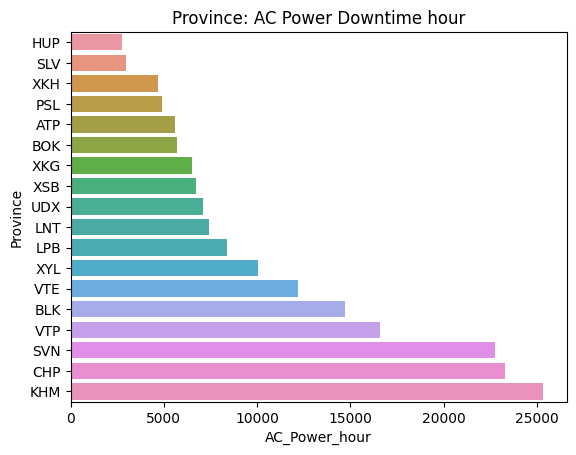

In [102]:
Prov_down = df_loss.groupby (["Province"] , sort=False)["AC_Power_hour"].sum()

plt.title('Province: AC Power Downtime hour')
Prov = sns.barplot(y=Prov_down.index, x=Prov_down, order=Prov_down.sort_values().index);
#District_down.bar_label(District_down.containers[0])
#print(District_down)

### KHM high Downtime by District

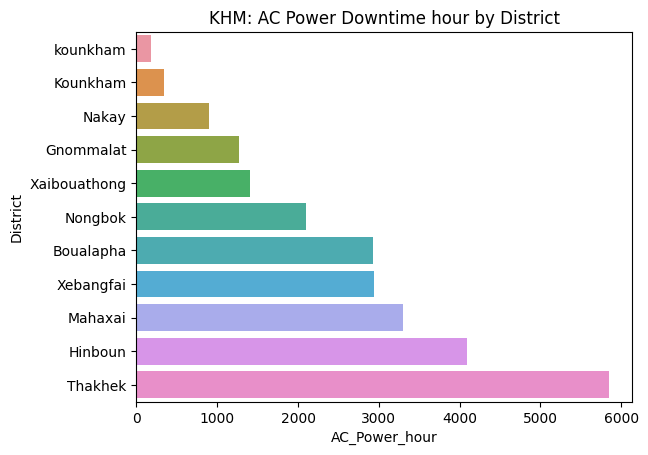

In [108]:
KHM_sitedown = df_loss[df_loss["Province"] == "KHM" ]

District_down = KHM_sitedown.groupby (["District"] , sort=False)["AC_Power_hour"].sum()

plt.title('KHM: AC Power Downtime hour by District')
District = sns.barplot(y=District_down.index, x=District_down, order=District_down.sort_values().index);
#District_down.bar_label(District_down.containers[0])
#print(District_down)

### KHM Site high Downtime by Thakhek

In [109]:
KHM_Thakhek = KHM_sitedown[df_loss["District"] == "Thakhek" ]
Thakhek_rev = KHM_Thakhek.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum()

Thakhek_top10_loss = Thakhek_rev.groupby(['Site_Name'])['AC_Power_hour'].sum().sort_values(ascending=False)

Thakhek_TOP10 = Thakhek_top10_loss.head(10)
display(Thakhek_TOP10)

Site_Name
KHM0087_NONSILA          246.0
KHM0065_PHALEAM          231.5
KHM0191_BANMUN           193.3
KHM0058_XIENGXON         172.9
KHM0056_NAKANG           153.7
KHM0057_PHONSAI          145.2
KHM0064_NAHUANGUA        141.3
KHM0063_THAMPHA          141.1
KHM0069_KOKHAI           140.8
KHM0072_NAKAIKHIAKHAM    134.9
Name: AC_Power_hour, dtype: float64

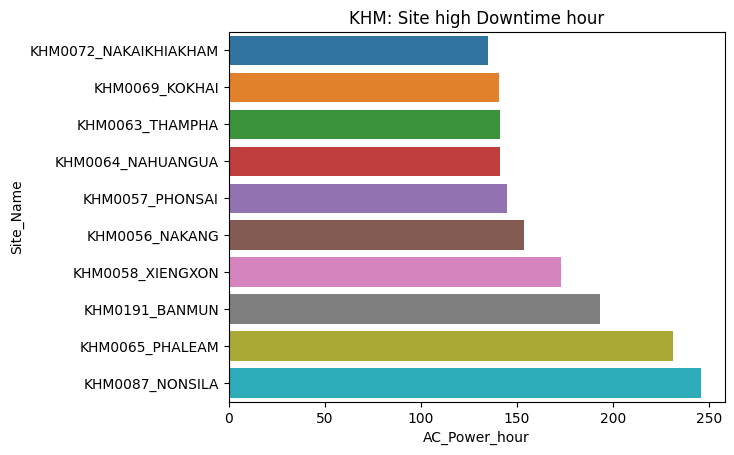

In [122]:
KHM_Thakhek = KHM_sitedown[df_loss["District"] == "Thakhek" ]

Thakhek_Site_down = KHM_Thakhek.groupby (["Site_Name"] , sort=False)["AC_Power_hour"].sum()
Thakhek_top10_loss = Thakhek_rev.groupby(['Site_Name'])['AC_Power_hour'].sum().sort_values(ascending=False)

Thakhek_TOP10 = Thakhek_top10_loss.head(10)
#display(Thakhek_TOP10)
plt.title('KHM: Site high Downtime hour')
KHM_Site = sns.barplot(y=Thakhek_TOP10.index, x=Thakhek_TOP10, order=Thakhek_TOP10.sort_values().index);
#KHM_Site.bar_label(KHM_Site.containers[0])
#print(District_down)

### KHM of Site high Downtime Revenue Loss
### 1.

In [124]:
KHM0087 = df_loss[df_loss["Site_Name"] == "KHM0087_NONSILA"]
KHM0087_revloss = KHM0087.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

KHM0087_batt = KHM0087.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

KHM0087_revloss['Total_Revenue'] = KHM0087_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
KHM0087_revloss['Revenue_Loss'] = KHM0087_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(KHM0087_revloss)
print(KHM0087_batt)

         Site_Name  AC_Power_hour    Total_Revenue Revenue_Loss
0  KHM0087_NONSILA          246.0  149,584,888.354    5,500,174
         Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  KHM0087_NONSILA  Battery                 360         38.0   

   Access_Time_Minute  
0                  60  


### 2.

In [125]:
KHM0065 = df_loss[df_loss["Site_Name"] == "KHM0065_PHALEAM"]
KHM0065_revloss = KHM0065.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

KHM0065_batt = KHM0065.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

KHM0065_revloss['Total_Revenue'] = KHM0065_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
KHM0065_revloss['Revenue_Loss'] = KHM0065_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(KHM0065_revloss)
print(KHM0065_batt)

         Site_Name  AC_Power_hour   Total_Revenue Revenue_Loss
0  KHM0065_PHALEAM          231.5  207,592,993.05    9,497,636
         Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  KHM0065_PHALEAM  Battery                  30         40.0   

   Access_Time_Minute  
0                  55  


### 3.

In [126]:
KHM0191 = df_loss[df_loss["Site_Name"] == "KHM0191_BANMUN"]
KHM0191_revloss = KHM0191.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

KHM0191_batt = KHM0191.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

KHM0191_revloss['Total_Revenue'] = KHM0191_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
KHM0191_revloss['Revenue_Loss'] = KHM0191_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(KHM0191_revloss)
print(KHM0191_batt)

        Site_Name  AC_Power_hour    Total_Revenue Revenue_Loss
0  KHM0191_BANMUN          193.3  121,011,161.501    1,867,659
        Site_Name     Battery  Backup_time_Minute  Distance_KM  \
0  KHM0191_BANMUN  No Battery                   0         70.0   

   Access_Time_Minute  
0                 120  


#### 4.

In [127]:
KHM0058 = df_loss[df_loss["Site_Name"] == "KHM0058_XIENGXON"]
KHM0058_revloss = KHM0058.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

KHM0058_batt = KHM0058.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

KHM0058_revloss['Total_Revenue'] = KHM0058_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
KHM0058_revloss['Revenue_Loss'] = KHM0058_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(KHM0058_revloss)
print(KHM0058_batt)

          Site_Name  AC_Power_hour   Total_Revenue Revenue_Loss
0  KHM0058_XIENGXON          172.9  259,915,063.31   10,957,446
          Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  KHM0058_XIENGXON  Battery                  60         35.0   

   Access_Time_Minute  
0                  45  


### 5.

In [128]:
KHM0056 = df_loss[df_loss["Site_Name"] == "KHM0056_NAKANG"]
KHM0056_revloss = KHM0056.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

KHM0056_batt = KHM0056.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

KHM0056_revloss['Total_Revenue'] = KHM0056_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
KHM0056_revloss['Revenue_Loss'] = KHM0056_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(KHM0056_revloss)
print(KHM0056_batt)

        Site_Name  AC_Power_hour   Total_Revenue Revenue_Loss
0  KHM0056_NAKANG          153.7  379,879,650.01   12,626,266
        Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  KHM0056_NAKANG  Battery                  20         38.0   

   Access_Time_Minute  
0                  50  


### 6.

In [129]:
KHM0057 = df_loss[df_loss["Site_Name"] == "KHM0057_PHONSAI"]
KHM0057_revloss = KHM0057.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

KHM0057_batt = KHM0057.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

KHM0057_revloss['Total_Revenue'] = KHM0057_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
KHM0057_revloss['Revenue_Loss'] = KHM0057_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(KHM0057_revloss)
print(KHM0057_batt)

         Site_Name  AC_Power_hour   Total_Revenue Revenue_Loss
0  KHM0057_PHONSAI          145.2  94,971,990.517    1,483,920
         Site_Name            Battery  Backup_time_Minute  Distance_KM  \
0  KHM0057_PHONSAI  Battery no backup                   0         40.0   

   Access_Time_Minute  
0                  60  


### 7.

In [130]:
KHM0064 = df_loss[df_loss["Site_Name"] == "KHM0064_NAHUANGUA"]
KHM0064_revloss = KHM0064.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

KHM0064_batt = KHM0064.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

KHM0064_revloss['Total_Revenue'] = KHM0064_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
KHM0064_revloss['Revenue_Loss'] = KHM0064_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(KHM0064_revloss)
print(KHM0064_batt)

           Site_Name  AC_Power_hour   Total_Revenue Revenue_Loss
0  KHM0064_NAHUANGUA          141.3  66,391,081.089      874,855
           Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  KHM0064_NAHUANGUA  Battery                 120         30.0   

   Access_Time_Minute  
0                  40  


### 8.

In [131]:
KHM0063 = df_loss[df_loss["Site_Name"] == "KHM0063_THAMPHA"]
KHM0063_revloss = KHM0063.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

KHM0063_batt = KHM0063.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

KHM0063_revloss['Total_Revenue'] = KHM0063_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
KHM0063_revloss['Revenue_Loss'] = KHM0063_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(KHM0063_revloss)
print(KHM0063_batt)

         Site_Name  AC_Power_hour   Total_Revenue Revenue_Loss
0  KHM0063_THAMPHA          141.1  83,133,652.083    2,323,929
         Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  KHM0063_THAMPHA  Battery                  60         10.0   

   Access_Time_Minute  
0                  25  


### 9.

In [132]:
KHM0069 = df_loss[df_loss["Site_Name"] == "KHM0069_KOKHAI"]
KHM0069_revloss = KHM0069.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

KHM0069_batt = KHM0069.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

KHM0069_revloss['Total_Revenue'] = KHM0069_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
KHM0069_revloss['Revenue_Loss'] = KHM0069_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(KHM0069_revloss)
print(KHM0069_batt)

        Site_Name  AC_Power_hour         Total_Revenue Revenue_Loss
0  KHM0069_KOKHAI          140.8  110,705,011.34760475    2,430,076
        Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  KHM0069_KOKHAI  Battery                 120         16.0   

   Access_Time_Minute  
0                  25  


### 10.

In [133]:
KHM0072 = df_loss[df_loss["Site_Name"] == "KHM0072_NAKAIKHIAKHAM"]
KHM0072_revloss = KHM0072.groupby("Site_Name")["AC_Power_hour","Total_Revenue","Revenue_Loss"].sum().reset_index();

KHM0072_batt = KHM0072.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

KHM0072_revloss['Total_Revenue'] = KHM0072_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
KHM0072_revloss['Revenue_Loss'] = KHM0072_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(KHM0072_revloss)
print(KHM0072_batt)

               Site_Name  AC_Power_hour  Total_Revenue Revenue_Loss
0  KHM0072_NAKAIKHIAKHAM          134.9  257,082,542.5    5,847,476
               Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  KHM0072_NAKAIKHIAKHAM  Battery                  40         35.0   

   Access_Time_Minute  
0                  45  


In [46]:
df_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46642 entries, 0 to 46641
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                46642 non-null  object 
 1   Province             46642 non-null  object 
 2   Code_Site            46642 non-null  object 
 3   Site_Name            46641 non-null  object 
 4   District             46642 non-null  object 
 5   Number_ofCell        46642 non-null  int64  
 6   Total_Sub            46642 non-null  int64  
 7   Total_Volume_Mb      46642 non-null  float64
 8   Total_Revenue        46642 non-null  float64
 9   Rev_Priority         46642 non-null  object 
 10  Revenue_Loss         46642 non-null  int64  
 11  LTC_Sub              45876 non-null  float64
 12  LTC_Volume_Mb        45876 non-null  float64
 13  LTC_Revenue          45876 non-null  float64
 14  TPlus_Sub            45876 non-null  float64
 15  TPlus_Volume_Mb      45876 non-null 

In [47]:
#siteVTE = sitedown[sitedown["Province"] == "VTE" ]
site_Revloss = df_loss.groupby("Site_Name")["Revenue_Loss","Total_Revenue","AC_Power_hour"].sum()

site_top10_loss = site_Revloss.groupby(['Site_Name'])['Revenue_Loss'].sum().sort_values(ascending=False)

TOP10 = site_top10_loss.head(10)
display(TOP10)

Site_Name
BOK0116_GIHUA_BUILDING2    84456519
BLK0149_XIENGLEU           51617025
BOK0077_MYANMAR_VILLAGE    51228163
BLK0155_BOLIKHAN           45914134
BLK0150_MOUANGJAM          43742911
UDX0099_PANGTHONG          40782675
VTE0593_KM9_SOMVANG        37240097
LNT0063_CHIENGLAE          33269620
UDX0037_NACHANG            32532810
BLK0152_PHONKHAM           29702337
Name: Revenue_Loss, dtype: int64

### Top10 of Site high Revenue Loss
### 1.

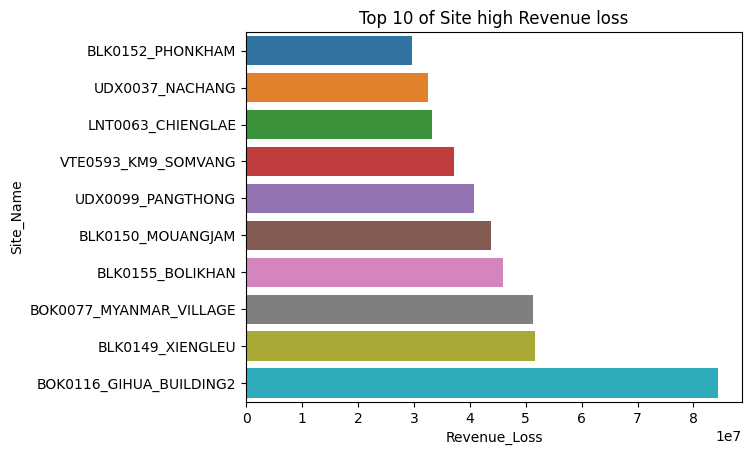

In [155]:
plt.title('Top 10 of Site high Revenue loss')
Top10_Site_loss = sns.barplot(y=TOP10.index, x=TOP10, order=TOP10.sort_values().index);
#District_down.bar_label(District_down.containers[0])
#print(District_down)

In [48]:
BOK0116 = df_loss[df_loss["Site_Name"] == "BOK0116_GIHUA_BUILDING2"]
BOK0116_revloss = BOK0116.groupby("Site_Name")["Revenue_Loss","Total_Revenue","AC_Power_hour"].sum().reset_index();

BOK0116_batt = BOK0116.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

BOK0116_revloss['Total_Revenue'] = BOK0116_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
BOK0116_revloss['Revenue_Loss'] = BOK0116_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(BOK0116_revloss)
print(BOK0116_batt)

                 Site_Name Revenue_Loss    Total_Revenue  AC_Power_hour
0  BOK0116_GIHUA_BUILDING2   84,456,519  2,169,248,822.9           14.9
                 Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  BOK0116_GIHUA_BUILDING2  Battery                 230         10.0   

   Access_Time_Minute  
0                  20  


### 2.

In [49]:
BLK0149 = df_loss[df_loss["Site_Name"] == "BLK0149_XIENGLEU"]
BLK0149_revloss = BLK0149.groupby("Site_Name")["Revenue_Loss","Total_Revenue","AC_Power_hour"].sum().reset_index();

BLK0149_batt = BLK0149.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

BLK0149_revloss['Total_Revenue'] = BLK0149_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
BLK0149_revloss['Revenue_Loss'] = BLK0149_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(BLK0149_revloss)
print(BLK0149_batt)

          Site_Name Revenue_Loss        Total_Revenue  AC_Power_hour
0  BLK0149_XIENGLEU   51,617,025  927,123,722.9200001          166.3
          Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  BLK0149_XIENGLEU  Battery                  60        124.0   

   Access_Time_Minute  
0                 180  


### 3.

In [50]:
BOK0077 = df_loss[df_loss["Site_Name"] == "BOK0077_MYANMAR_VILLAGE"]
BOK0077_revloss = BOK0077.groupby("Site_Name")["Revenue_Loss","Total_Revenue","AC_Power_hour"].sum().reset_index();

BOK0077_batt = BOK0077.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

BOK0077_revloss['Total_Revenue'] = BOK0077_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
BOK0077_revloss['Revenue_Loss'] = BOK0077_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(BOK0077_revloss)
print(BOK0077_batt)

                 Site_Name Revenue_Loss    Total_Revenue  AC_Power_hour
0  BOK0077_MYANMAR_VILLAGE   51,228,163  2,355,034,466.9           26.2
                 Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  BOK0077_MYANMAR_VILLAGE  Battery                 190         10.0   

   Access_Time_Minute  
0                  20  


### 4.

In [51]:
BLK0155 = df_loss[df_loss["Site_Name"] == "BLK0155_BOLIKHAN"]
BLK0155_revloss = BLK0155.groupby("Site_Name")["Revenue_Loss","Total_Revenue","AC_Power_hour"].sum().reset_index();

BLK0155_batt = BLK0155.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

BLK0155_revloss['Total_Revenue'] = BLK0155_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
BLK0155_revloss['Revenue_Loss'] = BLK0155_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(BLK0155_revloss)
print(BLK0155_batt)

          Site_Name Revenue_Loss     Total_Revenue  AC_Power_hour
0  BLK0155_BOLIKHAN   45,914,134  1,120,755,054.87          171.9
          Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  BLK0155_BOLIKHAN  Battery                  30         28.0   

   Access_Time_Minute  
0                  60  


### 5.

In [52]:
BLK0150 = df_loss[df_loss["Site_Name"] == "BLK0150_MOUANGJAM"]
BLK0150_revloss = BLK0150.groupby("Site_Name")["Revenue_Loss","Total_Revenue","AC_Power_hour"].sum().reset_index();

BLK0150_batt = BLK0150.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

BLK0150_revloss['Total_Revenue'] = BLK0150_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
BLK0150_revloss['Revenue_Loss'] = BLK0150_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(BLK0150_revloss)
print(BLK0150_batt)

           Site_Name Revenue_Loss   Total_Revenue  AC_Power_hour
0  BLK0150_MOUANGJAM   43,742,911  577,259,001.23           25.9
           Site_Name      Battery  Backup_time_Minute  Distance_KM  \
0  BLK0150_MOUANGJAM  Battery_Gen                  30        162.0   

   Access_Time_Minute  
0                 240  


### 6.

In [53]:
UDX0099 = df_loss[df_loss["Site_Name"] == "UDX0099_PANGTHONG"]
UDX0099_revloss = UDX0099.groupby("Site_Name")["Revenue_Loss","Total_Revenue","AC_Power_hour"].sum().reset_index();

UDX0099_batt = UDX0099.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

UDX0099_revloss['Total_Revenue'] = UDX0099_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
UDX0099_revloss['Revenue_Loss'] = UDX0099_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(UDX0099_revloss)
print(UDX0099_batt)

           Site_Name Revenue_Loss   Total_Revenue  AC_Power_hour
0  UDX0099_PANGTHONG   40,782,675  786,619,563.25          180.1
           Site_Name      Battery  Backup_time_Minute  Distance_KM  \
0  UDX0099_PANGTHONG  Battery_Gen                 120         75.0   

   Access_Time_Minute  
0                 110  


### 7.

In [54]:
VTE0593 = df_loss[df_loss["Site_Name"] == "VTE0593_KM9_SOMVANG"]
VTE0593_revloss = VTE0593.groupby("Site_Name")["Revenue_Loss","Total_Revenue","AC_Power_hour"].sum().reset_index();

VTE0593_batt = VTE0593.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

VTE0593_revloss['Total_Revenue'] = VTE0593_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
VTE0593_revloss['Revenue_Loss'] = VTE0593_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(VTE0593_revloss)
print(VTE0593_batt)

             Site_Name Revenue_Loss    Total_Revenue  AC_Power_hour
0  VTE0593_KM9_SOMVANG   37,240,097  1,813,846,492.2           15.5
             Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  VTE0593_KM9_SOMVANG  Battery                 180          8.0   

   Access_Time_Minute  
0                  30  


### 8.

In [55]:
LNT0063 = df_loss[df_loss["Site_Name"] == "LNT0063_CHIENGLAE"]
LNT0063_revloss = LNT0063.groupby("Site_Name")["Revenue_Loss","Total_Revenue","AC_Power_hour"].sum().reset_index();

LNT0063_batt = LNT0063.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

LNT0063_revloss['Total_Revenue'] = LNT0063_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
LNT0063_revloss['Revenue_Loss'] = LNT0063_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(LNT0063_revloss)
print(LNT0063_batt)

           Site_Name Revenue_Loss   Total_Revenue  AC_Power_hour
0  LNT0063_CHIENGLAE   33,269,620  781,615,021.24          197.5
           Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  LNT0063_CHIENGLAE  Battery                  30         65.0   

   Access_Time_Minute  
0                 120  


### 9.

In [56]:
UDX0037 = df_loss[df_loss["Site_Name"] == "UDX0037_NACHANG"]
UDX0037_revloss = UDX0037.groupby("Site_Name")["Revenue_Loss","Total_Revenue","AC_Power_hour"].sum().reset_index();

UDX0037_batt = UDX0037.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

UDX0037_revloss['Total_Revenue'] = UDX0037_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
UDX0037_revloss['Revenue_Loss'] = UDX0037_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(UDX0037_revloss)
print(UDX0037_batt)

         Site_Name Revenue_Loss   Total_Revenue  AC_Power_hour
0  UDX0037_NACHANG   32,532,810  432,757,447.31          245.3
         Site_Name      Battery  Backup_time_Minute  Distance_KM  \
0  UDX0037_NACHANG  Battery_Gen                  30         22.0   

   Access_Time_Minute  
0                  60  


### 10.

In [57]:
BLK0152 = df_loss[df_loss["Site_Name"] == "BLK0152_PHONKHAM"]
BLK0152_revloss = BLK0152.groupby("Site_Name")["Revenue_Loss","Total_Revenue","AC_Power_hour"].sum().reset_index();

BLK0152_batt = BLK0152.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

BLK0152_revloss['Total_Revenue'] = BLK0152_revloss.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
BLK0152_revloss['Revenue_Loss'] = BLK0152_revloss.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(BLK0152_revloss)
print(BLK0152_batt)

          Site_Name Revenue_Loss   Total_Revenue  AC_Power_hour
0  BLK0152_PHONKHAM   29,702,337  346,441,534.13          238.7
          Site_Name  Battery  Backup_time_Minute  Distance_KM  \
0  BLK0152_PHONKHAM  Battery                  10        195.0   

   Access_Time_Minute  
0                 300  


### Top10 of Site high Usage but no Battery
### 1.

In [58]:
site_nobatt = df_loss[df_loss["Battery"] == "No Battery" ]
#site_no_batt = site_nobatt.groupby("Site_Name")["Total_Revenue","Revenue_Loss","AC_Power_hour"].sum()

top10_no_batt = site_nobatt.groupby(['Site_Name'])['Total_Revenue'].sum().sort_values(ascending=False)
Batt_Top10 = top10_no_batt.head(10)
display(Batt_Top10)

Site_Name
VTP0056_BOUNGPHAO               1.214378e+09
VTP0169_NAOUDOMXAY              1.127157e+09
VTP0072_NAPHAENG                1.044384e+09
LNT0015_PHONEXAISAVANG          1.040865e+09
BOK0146_INDOOR_ITS_PINRONG_A    1.008217e+09
VTP0158_PARKKHAGNOUNG           9.037196e+08
VTP0083_TANPIEOW                8.263751e+08
VTE0279_MAHOSOD_WATERTHANK      7.936989e+08
VTP0295_PHONSAEN                7.812516e+08
VTP0219_PHONMUOANG_HH           6.865322e+08
Name: Total_Revenue, dtype: float64

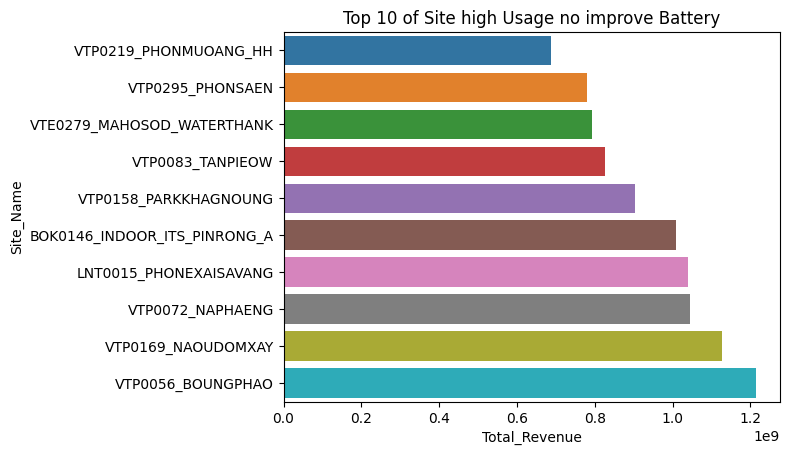

In [154]:
plt.title('Top 10 of Site high Usage no improve Battery')
Top10_Batt_Top10 = sns.barplot(y=Batt_Top10.index, x=Batt_Top10, order=Batt_Top10.sort_values().index);
#District_down.bar_label(District_down.containers[0])
#print(District_down)

In [59]:
VTP0056 = df_loss[df_loss["Site_Name"] == "VTP0056_BOUNGPHAO"]
VTP0056_high_rev = VTP0056.groupby("Site_Name")["Total_Revenue","Revenue_Loss","AC_Power_hour"].sum().reset_index();

VTP0056_batt = VTP0056.groupby(["Site_Name",'Battery'])["Backup_time_Minute","Distance_KM","Access_Time_Minute"].max().reset_index();

VTP0056_high_rev['Total_Revenue'] = VTP0056_high_rev.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
VTP0056_high_rev['Revenue_Loss'] = VTP0056_high_rev.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(VTP0056_high_rev)
print(VTP0056_batt)

           Site_Name     Total_Revenue Revenue_Loss  AC_Power_hour
0  VTP0056_BOUNGPHAO  1,214,378,282.64    9,385,781           48.7
           Site_Name     Battery  Backup_time_Minute  Distance_KM  \
0  VTP0056_BOUNGPHAO  No Battery                   0         33.0   

   Access_Time_Minute  
0                  50  


### 2.

In [60]:
VTP0169 = df_loss[df_loss["Site_Name"] == "VTP0169_NAOUDOMXAY"]
VTP0169_high_rev = VTP0169.groupby("Site_Name")["Total_Revenue","Revenue_Loss","AC_Power_hour"].sum().reset_index();

VTP0169_batt = VTP0169.groupby(["Site_Name",'Battery'])["Distance_KM","Access_Time_Minute"].max().reset_index();

VTP0169_high_rev['Total_Revenue'] = VTP0169_high_rev.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
VTP0169_high_rev['Revenue_Loss'] = VTP0169_high_rev.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(VTP0169_high_rev)
print(VTP0169_batt)

            Site_Name     Total_Revenue Revenue_Loss  AC_Power_hour
0  VTP0169_NAOUDOMXAY  1,127,157,055.52    6,136,539           29.6
            Site_Name     Battery  Distance_KM  Access_Time_Minute
0  VTP0169_NAOUDOMXAY  No Battery         18.0                  45


### 4.

In [61]:
VTP0072 = df_loss[df_loss["Site_Name"] == "VTP0072_NAPHAENG"]
VTP0072_high_rev = VTP0072.groupby("Site_Name")["Total_Revenue","Revenue_Loss","AC_Power_hour"].sum().reset_index();

VTP0072_batt = VTP0072.groupby(["Site_Name",'Battery'])["Distance_KM","Access_Time_Minute"].max().reset_index();

VTP0072_high_rev['Total_Revenue'] = VTP0072_high_rev.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
VTP0072_high_rev['Revenue_Loss'] = VTP0072_high_rev.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(VTP0072_high_rev)
print(VTP0072_batt)

          Site_Name     Total_Revenue Revenue_Loss  AC_Power_hour
0  VTP0072_NAPHAENG  1,044,384,161.71    1,956,550           10.1
          Site_Name     Battery  Distance_KM  Access_Time_Minute
0  VTP0072_NAPHAENG  No Battery         45.0                  90


### 4.

In [62]:
LNT0015 = df_loss[df_loss["Site_Name"] == "LNT0015_PHONEXAISAVANG"]
LNT0015_high_rev = LNT0015.groupby("Site_Name")["Total_Revenue","Revenue_Loss","AC_Power_hour"].sum().reset_index();

LNT0015_batt = LNT0015.groupby(["Site_Name",'Battery'])["Distance_KM","Access_Time_Minute"].max().reset_index();

LNT0015_high_rev['Total_Revenue'] = LNT0015_high_rev.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
LNT0015_high_rev['Revenue_Loss'] = LNT0015_high_rev.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(LNT0015_high_rev)
print(LNT0015_batt)

                Site_Name          Total_Revenue Revenue_Loss  AC_Power_hour
0  LNT0015_PHONEXAISAVANG  1,040,864,507.4100001   14,824,562           68.5
                Site_Name     Battery  Distance_KM  Access_Time_Minute
0  LNT0015_PHONEXAISAVANG  No Battery         15.0                  30


### 5.

In [63]:
BOK0146 = df_loss[df_loss["Site_Name"] == "BOK0146_INDOOR_ITS_PINRONG_A"]
BOK0146_high_rev = BOK0146.groupby("Site_Name")["Total_Revenue","Revenue_Loss","AC_Power_hour"].sum().reset_index();

BOK0146_batt = BOK0146.groupby(["Site_Name",'Battery'])["Distance_KM","Access_Time_Minute"].max().reset_index();

BOK0146_high_rev['Total_Revenue'] = BOK0146_high_rev.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
BOK0146_high_rev['Revenue_Loss'] = BOK0146_high_rev.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(BOK0146_high_rev)
print(BOK0146_batt)

                      Site_Name     Total_Revenue Revenue_Loss  AC_Power_hour
0  BOK0146_INDOOR_ITS_PINRONG_A  1,008,217,299.72    1,392,805           13.8
                      Site_Name     Battery  Distance_KM  Access_Time_Minute
0  BOK0146_INDOOR_ITS_PINRONG_A  No Battery         10.0                  20


### 6.

In [64]:
VTP0158 = df_loss[df_loss["Site_Name"] == "VTP0158_PARKKHAGNOUNG"]
VTP0158_high_rev = VTP0158.groupby("Site_Name")["Total_Revenue","Revenue_Loss","AC_Power_hour"].sum().reset_index();

VTP0158_batt = VTP0158.groupby(["Site_Name",'Battery'])["Distance_KM","Access_Time_Minute"].max().reset_index();

VTP0158_high_rev['Total_Revenue'] = VTP0158_high_rev.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
VTP0158_high_rev['Revenue_Loss'] = VTP0158_high_rev.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(VTP0158_high_rev)
print(VTP0158_batt)

               Site_Name   Total_Revenue Revenue_Loss  AC_Power_hour
0  VTP0158_PARKKHAGNOUNG  903,719,593.24    3,127,892           15.4
               Site_Name     Battery  Distance_KM  Access_Time_Minute
0  VTP0158_PARKKHAGNOUNG  No Battery         12.0                  20


### 7.

In [65]:
VTP0083 = df_loss[df_loss["Site_Name"] == "VTP0083_TANPIEOW"]
VTP0083_high_rev = VTP0083.groupby("Site_Name")["Total_Revenue","Revenue_Loss","AC_Power_hour"].sum().reset_index();

VTP0083_batt = VTP0083.groupby(["Site_Name",'Battery'])["Distance_KM","Access_Time_Minute"].max().reset_index();

VTP0083_high_rev['Total_Revenue'] = VTP0083_high_rev.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
VTP0083_high_rev['Revenue_Loss'] = VTP0083_high_rev.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(VTP0083_high_rev)
print(VTP0083_batt)

          Site_Name   Total_Revenue Revenue_Loss  AC_Power_hour
0  VTP0083_TANPIEOW  826,375,090.49    8,712,740           41.9
          Site_Name     Battery  Distance_KM  Access_Time_Minute
0  VTP0083_TANPIEOW  No Battery         49.0                 120


### 8.

In [66]:
VTE0279 = df_loss[df_loss["Site_Name"] == "VTE0279_MAHOSOD_WATERTHANK"]
VTE0279_high_rev = VTE0279.groupby("Site_Name")["Total_Revenue","Revenue_Loss","AC_Power_hour"].sum().reset_index();

VTE0279_batt = VTE0279.groupby(["Site_Name",'Battery'])["Distance_KM","Access_Time_Minute"].max().reset_index();

VTE0279_high_rev['Total_Revenue'] = VTE0279_high_rev.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
VTE0279_high_rev['Revenue_Loss'] = VTE0279_high_rev.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(VTE0279_high_rev)
print(VTE0279_batt)

                    Site_Name        Total_Revenue Revenue_Loss  AC_Power_hour
0  VTE0279_MAHOSOD_WATERTHANK  793,698,907.0799999    1,708,551           10.3
                    Site_Name     Battery  Distance_KM  Access_Time_Minute
0  VTE0279_MAHOSOD_WATERTHANK  No Battery          2.0                  10


### 9.

In [67]:
VTP0295 = df_loss[df_loss["Site_Name"] == "VTP0295_PHONSAEN"]
VTP0295_high_rev = VTP0295.groupby("Site_Name")["Total_Revenue","Revenue_Loss","AC_Power_hour"].sum().reset_index();

VTP0295_batt = VTP0295.groupby(["Site_Name",'Battery'])["Distance_KM","Access_Time_Minute"].max().reset_index();

VTP0295_high_rev['Total_Revenue'] = VTP0295_high_rev.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
VTP0295_high_rev['Revenue_Loss'] = VTP0295_high_rev.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(VTP0295_high_rev)
print(VTP0295_batt)

          Site_Name   Total_Revenue Revenue_Loss  AC_Power_hour
0  VTP0295_PHONSAEN  781,251,602.38   14,183,072           86.5
          Site_Name     Battery  Distance_KM  Access_Time_Minute
0  VTP0295_PHONSAEN  No Battery         95.0                 240


### 10.

In [68]:
VTP0219 = df_loss[df_loss["Site_Name"] == "VTP0219_PHONMUOANG_HH"]
VTP0219_high_rev = VTP0219.groupby("Site_Name")["Total_Revenue","Revenue_Loss","AC_Power_hour"].sum().reset_index();

VTP0219_batt = VTP0219.groupby(["Site_Name",'Battery'])["Distance_KM","Access_Time_Minute"].max().reset_index();

VTP0219_high_rev['Total_Revenue'] = VTP0219_high_rev.apply(lambda x: "{:,}".format(x['Total_Revenue']), axis=1)
VTP0219_high_rev['Revenue_Loss'] = VTP0219_high_rev.apply(lambda x: "{:,}".format(x['Revenue_Loss']), axis=1)

print(VTP0219_high_rev)
print(VTP0219_batt)

               Site_Name   Total_Revenue Revenue_Loss  AC_Power_hour
0  VTP0219_PHONMUOANG_HH  686,532,246.54   15,887,892          116.9
               Site_Name     Battery  Distance_KM  Access_Time_Minute
0  VTP0219_PHONMUOANG_HH  No Battery         48.0                 120
